# Forelesning 4: Statistikk II

I denne forelesningen skal vi se på statistisk inferens og hvordan vi kan bruke statistiske metoder for å trekke konklusjoner fra data.
- utføre regresjonsanalyse
- utføre og tolke hypotesetester
- regne ut og tolke korrelasjon

## Repetisjon

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("oksygen.csv")
df.head()

,konsentrasjon_O2
0,3.2
1,3.5
2,3.3
3,5.8
4,3.1


In [25]:
oksygen = df["konsentrasjon_O2"]
snitt = oksygen.mean()
avvik = oksygen.std()
print(f"Oksygenkonsentrasjonen var {snitt:.1f} +- {avvik:.1f}")

Oksygenkonsentrasjonen var 4.0 +- 1.2


In [31]:
O2_riktig = oksygen[oksygen <= 5]
snitt = O2_riktig.mean()
avvik = O2_riktig.std()
print(f"Oksygenkonsentrasjonen var {snitt:.1f} +- {avvik:.1f}")

Oksygenkonsentrasjonen var 3.3 +- 0.2


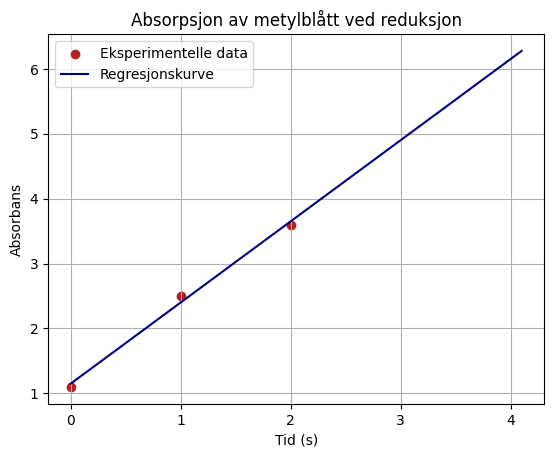

In [55]:
absdata = pd.read_csv("absorbans.txt", sep = ",")
tid = absdata["tid_s"]
absorbans = absdata["abs"]

a, b = np.polyfit(tid, absorbans, 1)

x_ny = np.linspace(0, tid.max() + 0.5)
y_ny = a*x_ny + b

plt.scatter(tid, absorbans, color = "firebrick", label = "Eksperimentelle data")
plt.plot(x_ny, y_ny, color = "navy", label = "Regresjonskurve")
plt.xlabel("Tid (s)")
plt.ylabel("Absorbans")
plt.grid()
plt.title("Absorpsjon av metylblått ved reduksjon")
plt.legend()
plt.show()

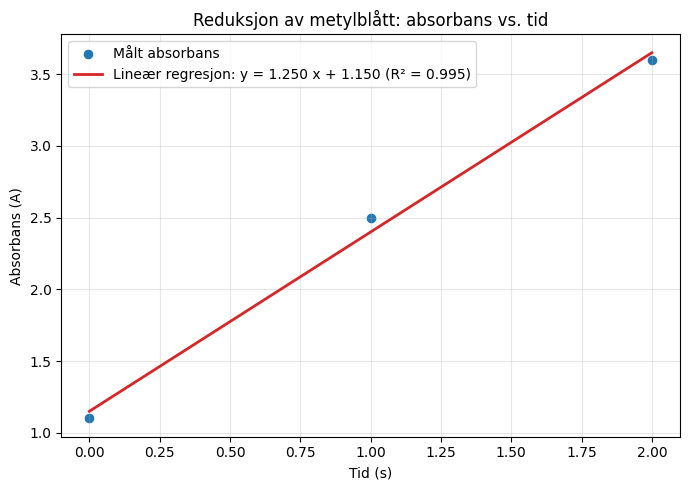

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Les data
absdata = pd.read_csv("absorbans.txt", sep=",")
tid = absdata["tid_s"].to_numpy()
absorbans = absdata["abs"].to_numpy()

# Lineær regresjon (to måter; polyfit eller linregress for R^2)
a, b = np.polyfit(tid, absorbans, 1)  # a = stigning, b = intercept

# Bruk tidens spenn for x-verdiene til linjen
x_ny = np.linspace(tid.min(), tid.max(), 200)
y_ny = a * x_ny + b

# Alternativt: få R^2 og usikkerheter via scipy (valgfritt)
lr = linregress(tid, absorbans)
r2 = lr.rvalue**2

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(tid, absorbans, s=35, color="tab:blue", label="Målt absorbans")
ax.plot(x_ny, y_ny, color="tab:red", lw=2,
        label=f"Lineær regresjon: y = {a:.3f} x + {b:.3f} (R² = {r2:.3f})")

ax.set_title("Reduksjon av metylblått: absorbans vs. tid")
ax.set_xlabel("Tid (s)")
ax.set_ylabel("Absorbans (A)")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

# Valgfritt: lagre figuren
# fig.savefig("metylblaatt_absorbans_regresjon.png", dpi=300)


## Regresjon I: Polyfit

## Regresjon II: Curve_fit

/var/folders/z_/zd2_19g1205dvcvdhgk10p680000gp/T/ipykernel_9240/2671664886.py:7: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*x)


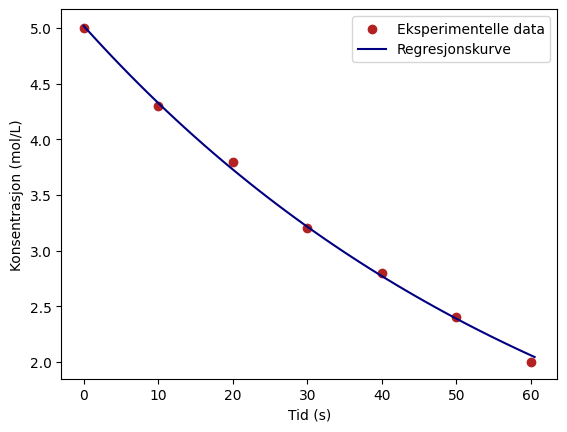

In [62]:
from scipy.optimize import curve_fit

tid = np.array([0, 10, 20, 30, 40, 50 ,60])
kons = np.array([5.0, 4.3, 3.8, 3.2, 2.8, 2.4, 2.0])

def modell(x, a, b):
    return a*np.exp(-b*x)

coeff, covar = curve_fit(modell, tid, kons)
a = coeff[0]
b = coeff[1]

x_ny = np.linspace(0, tid.max() + 0.5)
y_ny = modell(x_ny, a, b)

plt.scatter(tid, kons, color = "firebrick", label = "Eksperimentelle data")
plt.plot(x_ny, y_ny, color = "navy", label = "Regresjonskurve")
plt.xlabel("Tid (s)")
plt.ylabel("Konsentrasjon (mol/L)")
plt.legend()
plt.show()


__Oppgave 1: Analyse av en enzymkatalysert reaksjon__

Du studerer en enzymkatalysert reaksjon hvor enzymet katalyserer en reaksjon mellom et substrat og et produkt. Målingene viser følgende konsentrasjoner av substratet ($S$) over tid:

| Tid (s) | Konsentrasjon (mM) |
|---------|--------------------|
| 0       | 5.0                |
| 10      | 4.3                |
| 20      | 3.8                |
| 30      | 3.2                |
| 40      | 2.8                |
| 50      | 2.4                |
| 60      | 2.0                |

Lag en eksponentiell modell for nedbrytningen av substratet over tid.

## Hypotesetesting

Hypotesetesting er en metode for å teste om en antagelse om en populasjon er sann. Vi har en nullhypotese $H_0$ og en alternativ hypotese $H_1$. Vi antar at nullhypotesen er sann, og ser hvor sannsynlig det er å observere dataene vi har gitt denne antagelsen. Hvis sannsynligheten er lav, forkaster vi nullhypotesen.


### Uavhengig t-test

### Paret t-test

### T-test for ett utvalg

## Korrelasjon
